# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

#Import API key
from api_keys import weather_api_key
api_key = weather_api_key

#Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#list for holding lat_lngs and cities
lat_lngs = []
cities = []

#Created a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#Identified nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#Print the city count to confirm sufficient count
len(cities)

594

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities

['ixtapa',
 'madang',
 'esperance',
 'ribeira grande',
 'cabedelo',
 'bluff',
 'saint-pierre',
 'taolanaro',
 'codrington',
 'atuona',
 'mataura',
 'chicama',
 'punta arenas',
 'hofn',
 'cagayan de tawi-tawi',
 'albany',
 'illoqqortoormiut',
 'amderma',
 'port elizabeth',
 'luderitz',
 'new norfolk',
 'katsuura',
 'ushuaia',
 'busselton',
 'manchester',
 'pisco',
 'nikolskoye',
 'tidore',
 'mar del plata',
 'cabo san lucas',
 'arraial do cabo',
 'grindavik',
 'erzin',
 'upernavik',
 'hobart',
 'dryden',
 'avarua',
 'calama',
 'college',
 'palmer',
 'cidreira',
 'hermanus',
 'cao bang',
 'hilo',
 'vondrozo',
 'east london',
 'huarmey',
 'aswan',
 'tasiilaq',
 'khatanga',
 'pevek',
 'weligama',
 'springbok',
 'manggar',
 'broken hill',
 'bredasdorp',
 'ahipara',
 'sao teotonio',
 'kapaa',
 'lorengau',
 'bewar',
 'gamboma',
 'rochester',
 'belushya guba',
 'cape town',
 'dwarka',
 'iqaluit',
 'krasnoselkup',
 'tingrela',
 'ilulissat',
 'maribo',
 'las vegas',
 'tabuk',
 'jamestown',
 'avi

In [4]:
#url
url = 'https://api.openweathermap.org/data/2.5/weather?'
units = 'metric'

#build query
query_url = f'{url}appid={api_key}&units={units}&q='

#set up lists to hold response info
city_name = []
lng = []
lat = []
temp_max = []
humid = []
cloudiness = []
winds = []
countries =[]
date = []
city_data = []

#loop through the list of cities and prform a request for data on each
for city in cities:
    
      #create the request, get response
        response = requests.get(query_url + city).json()
           
        #appended the dataframe to add the variables below as columns
        city_name.append(response['name'])
        
        lat.append(response['coord']['lat'])
        
        lng.append(response['coord']['lon'])
        
        temp_max.append(response['main']['temp_max'])
        
        humid.append(response['main']['humidity'])

        cloudiness.append(response['clouds']['all'])
        
        winds.append(response['wind']['speed'])

        countries.append(response['sys']['country'])

        date.append(response['dt'])
        
        print(response['name'])


Ixtapa
Madang
Esperance
Ribeira Grande
Cabedelo
Bluff
Saint-Pierre


KeyError: 'name'

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#Created a dataframe below to hold the new variables that were created above

the_weather_df = pd.DataFrame({'City': city_name,
                               'Lat': lat,
                               'Lng': lng,
                               'Max Temp':temp_max,
                               'Humidity':humid,
                               'Wind': winds,
                               'Cloudiness': cloudiness,
                               'Country':countries,
                               'Date':date})

the_weather_df
#saved data to csv
the_weather_df.to_csv('BB_Homework.csv')


In [ ]:
#the_weather_df.head()

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#used .loc function to find all the cities where 'Humidity' is greater than [xyz] 
the_weather_df.loc[the_weather_df['Humidity']>100]


In [ ]:
#there were no cities that had humidity over 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

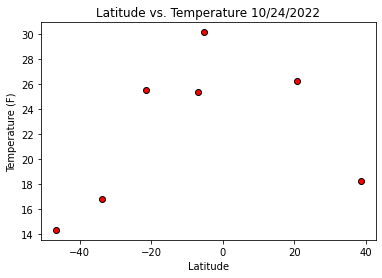

In [33]:
#created scatter plot to analyze the relationship between Latitude and Temp.

plt.scatter(the_weather_df['Lat'],
            the_weather_df['Max Temp'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Temperature 10/24/2022')
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.savefig('Homework_6')
plt.show()


## Latitude vs. Humidity Plot

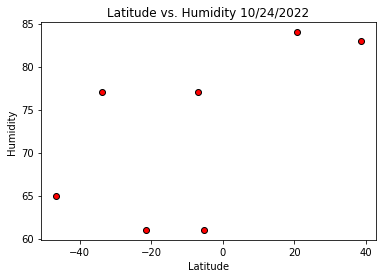

In [32]:
#created scatter plot to analyze the relationship between Latitude and Humidity.

plt.scatter(the_weather_df['Lat'],
            the_weather_df['Humidity'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Humidity 10/24/2022')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('Latitude_vs_Humidity.png')
plt.show()


## Latitude vs. Cloudiness Plot

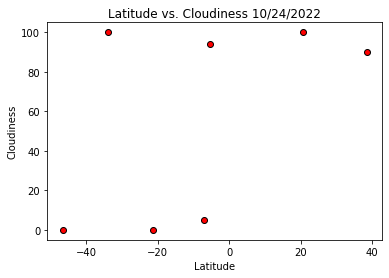

In [31]:
#created scatter plot to analyze the relationship between Latitude and Cloudiness.

plt.scatter(the_weather_df['Lat'],
            the_weather_df['Cloudiness'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Cloudiness 10/24/2022')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('Latitude_vs_Cloudiness.png')
plt.show()


## Latitude vs. Wind Speed Plot

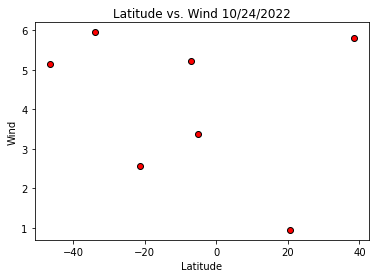

In [30]:
#created scatter plot to analyze the relationship between Latitude and Wind Speed.

plt.scatter(the_weather_df['Lat'],
            the_weather_df['Wind'],
            marker="o", facecolors="red", 
            edgecolors="black")                                                            

plt.title('Latitude vs. Wind 10/24/2022')
plt.xlabel('Latitude')
plt.ylabel('Wind')
plt.savefig('Latitude_vs_Wind.png')
plt.show()


## Linear Regression

In [12]:
#created North Hemisphere Dataframe
north_hem = the_weather_df.loc[the_weather_df['Lat'] >= 0]
north_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Wind,Cloudiness,Country,Date
0,Ixtapa,20.7000,-105.2,26.24,84,0.95,100,MX,1666672998
3,Ribeira Grande,38.5167,-28.7,18.21,83,5.81,90,PT,1666672999


In [13]:
#created South Hemisphere Dataframe
south_hem = the_weather_df.loc[the_weather_df['Lat'] <= 0]
south_hem.head()

,City,Lat,Lng,Max Temp,Humidity,Wind,Cloudiness,Country,Date
1,Madang,-5.2246,145.7966,30.15,61,3.38,94,PG,1666672999
2,Esperance,-33.8667,121.9000,16.79,77,5.95,100,AU,1666672965
4,Cabedelo,-6.9811,-34.8339,25.37,77,5.21,5,BR,1666673000
5,Bluff,-46.6000,168.3333,14.33,65,5.14,0,NZ,1666673000
6,Saint-Pierre,-21.3393,55.4781,25.51,61,2.57,0,RE,1666672831


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 1.0


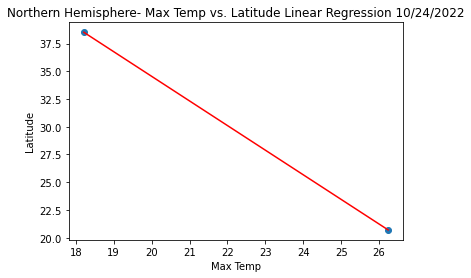

In [29]:
#created scatter plot for Max Temp vs. Latitude Linear Regression in the northern hemisphere

x_values = north_hem['Max Temp']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Max Temp vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Max Temp vs Lat.png')
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.8917460096571994


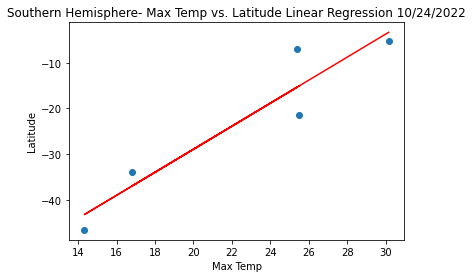

In [28]:
#created scatter plot for Max Temp vs. Latitude Linear Regression in the southern hemisphere

x_values = south_hem['Max Temp']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Max Temp vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Max Temp')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Max Temp vs Lat.png')
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 1.0


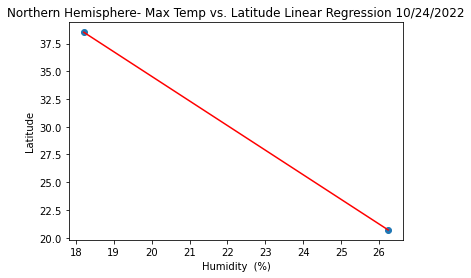

In [27]:
#created scatter plot for Humidity vs. Latitude Linear Regression in the northern hemisphere

x_values = north_hem['Max Temp']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Max Temp vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Humidity  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Humidity vs Lat.png')
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.001083380974141234


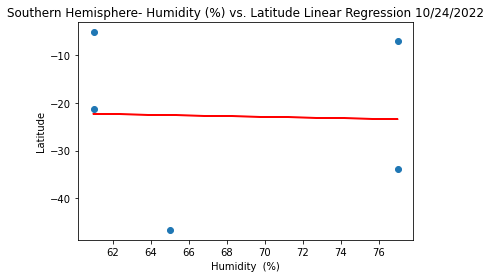

In [26]:
#created scatter plot for Humidity vs. Latitude Linear Regression in the southern hemisphere

x_values = south_hem['Humidity']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Humidity (%) vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Humidity  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Humidity vs Lat.png')
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.0


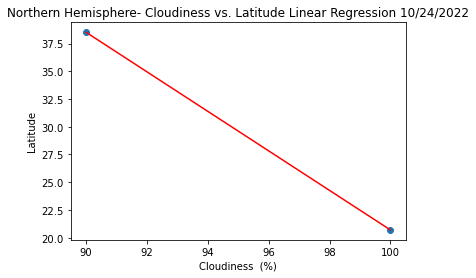

In [25]:
#created scatter plot for Cloudiness vs. Latitude Linear Regression in the northern hemisphere

x_values = north_hem['Cloudiness']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Cloudiness vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Cloudiness  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Cloudiness vs Lat.png')
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.028556717313421843


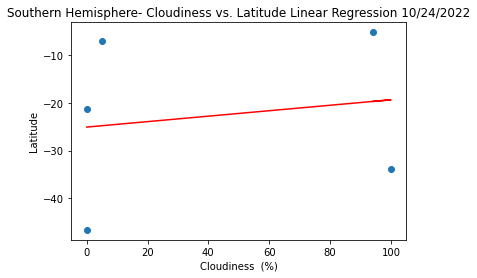

In [24]:
#created scatter plot for Cloudiness vs. Latitude Linear Regression in the southern hemisphere

x_values = south_hem['Cloudiness']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Cloudiness vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Cloudiness  (%)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Cloudiness vs Lat.png')
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 1.0


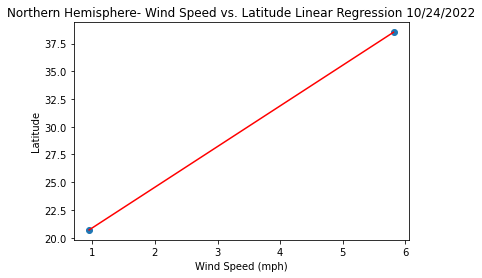

In [23]:
#created scatter plot for Wind Speed (mph) vs. Latitude Linear Regression in the northern hemisphere

x_values = north_hem['Wind']
y_values = north_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Northern Hemisphere- Wind Speed vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Northern Hemisphere Wind Speed vs Lat.png')
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1814226248567703


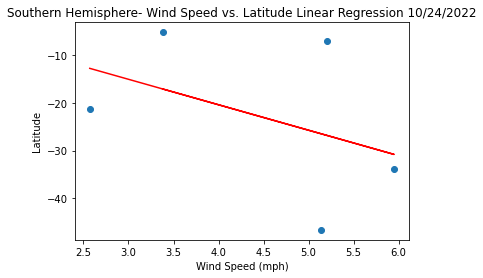

In [22]:
#created scatter plot for Wind Speed (mph) vs. Latitude Linear Regression in the southern hemisphere

x_values = south_hem['Wind']
y_values = south_hem['Lat']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.title('Southern Hemisphere- Wind Speed vs. Latitude Linear Regression 10/24/2022')
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
print(f"The r-squared is: {rvalue**2}")
plt.savefig('Southern Hemisphere Wind Speed vs Lat.png')
plt.show()
